In [1]:
# automatic reloading of modules
%load_ext autoreload
%autoreload 2

In [2]:
import os
import openai
import pandas as pd

In [3]:
# print the entire output of a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# also print the entire content of a dfs column
pd.set_option('display.max_colwidth', None)

In [1]:
from zero_shot_models.cgpt import *

In [2]:
path_to_data = '../data/liar_dataset/test.tsv'
test = read_data(path_to_data)

path_to_data = '../data/liar_dataset/valid.tsv'
valid = read_data(path_to_data)

path_to_data = '../data/liar_dataset/train.tsv'
train = read_data(path_to_data)


In [3]:
labels_map = {'pants-fire': "false", 'false':"false", 'barely-true':"false", 'half-true':"false", 'mostly-true':"true", 'true':"true"}

In [4]:
test["label"] = test["label"].map(labels_map)
valid["label"] = valid["label"].map(labels_map)
train["label"] = train["label"].map(labels_map)

In [5]:
valid.label.value_counts()

false    864
true     420
Name: label, dtype: int64

In [6]:
test.label.value_counts()

false    818
true     449
Name: label, dtype: int64

In [13]:
get_label_and_explanation_from_df(test.head(1), text_col='statement', include_speaker=True, include_subject=True, include_job_title=True, include_context=True)

/Users/viktortorpthomsen/Desktop/kds/sem4/research_project/src/zero_shot_models/cgpt.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["prediction"] = [""] * len(df)
/Users/viktortorpthomsen/Desktop/kds/sem4/research_project/src/zero_shot_models/cgpt.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explanation"] = [""] *  len(df)
  0%|          | 0/1 [00:00<?, ?it/s]/Users/viktortorpthomsen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A val

99 1
99 1


,id,label,statement,subject,speaker,speaker_job,state_info,party,barely_true_count,false_count,half_true_count,mostly_true_count,pants_on_fire_count,context,prediction,explanation
0,11972.json,true,Building a wall on the U.S.-Mexico border will take literally years.,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,mostly-true,"Building a wall on the U.S.-Mexico border will likely take several years to complete, depending on the size and scope of the project."


In [9]:
calc_price(train, get_prompt(""),token_price=0.02/1000 )

20.50898

In [10]:
openai.api_key = "SOME_KEY"

In [12]:
train_results = get_label_and_explanation_from_df(train, binary=True, text_col='statement', include_speaker=True, include_subject=True, include_job_title=True, include_context=True, path_to_save='train_cgpt_binary_context_p2.csv')
#train_results.to_csv('train_cgpt_binary_context.csv')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


100%|██████████| 1024/1024 [9:08:38<00:00, 32.15s/it]   


In [ ]:
valid_results = get_label_and_explanation_from_df(valid, binary=True, text_col='statement', include_speaker=True, include_subject=True, include_job_title=True, include_context=True)
valid_results.to_csv('valid_cgpt_binary_context.csv')

In [89]:
test_results = get_label_and_explanation_from_df(test, binary=True, text_col='statement', include_speaker=True, include_subject=True, include_job_title=True, include_context=True)
test_results.to_csv('test_cgpt_binary_context.csv')

In [90]:
labels = ['false', 'true']

# Results overview

In [91]:
# import pandas, np, matplotlib, and from sklearn import classification report, accuracy, f1, confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix


In [92]:
valid_true = valid_results.label.values
valid_pred = valid_results.prediction.values

In [93]:
test_true = test_results.label.values
test_pred = test_results.prediction.values

In [94]:
np.unique(valid_pred, return_counts=True)

(array(['false', 'true'], dtype=object), array([1041,  243]))

In [95]:
np.unique(test_pred, return_counts=True)

(array(['false', 'true'], dtype=object), array([972, 295]))

              precision    recall  f1-score   support

       false       0.70      0.85      0.77       864
        true       0.46      0.26      0.33       420

    accuracy                           0.66      1284
   macro avg       0.58      0.56      0.55      1284
weighted avg       0.62      0.66      0.63      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

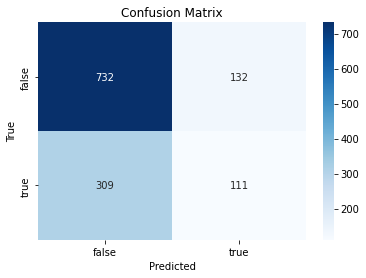

In [96]:
# print classification report and confusion matrix as a heatmap for valid set 
print(classification_report(valid_true, valid_pred, zero_division=0))
cm = confusion_matrix(valid_true, valid_pred)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

       false       0.70      0.84      0.77       818
        true       0.55      0.36      0.44       449

    accuracy                           0.67      1267
   macro avg       0.63      0.60      0.60      1267
weighted avg       0.65      0.67      0.65      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

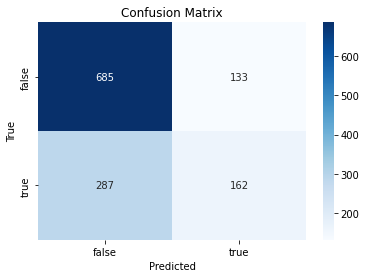

In [97]:
# print classification report and confusion matrix as a heatmap for test set 
print(classification_report(test_true, test_pred, zero_division=0))
cm = confusion_matrix(test_true, test_pred)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [69]:
# print all content in pd column
pd.set_option('display.max_colwidth', None)

In [70]:
test_results.loc[test_results.prediction == 'abstain',['statement','label','prediction','explanation']].T

,11,142,179,236,265,268,354,438,449,667,758,814,850,931,1137
statement,PolitiFact Texas says Congressman Edwards attacks on Bill Flores are false.,"The sex-offender registry has been around for a long time, and the research thats out there says that it has no positive impact on the public safety.","John McCain ""has not led on nonproliferation issues when he had the chance in the Senate.""","As weve seen that federal support for states diminish, youve seen the biggest job losses in the public sector -- teachers, police officers, firefighters losing their jobs.",Obamacare ... will kill jobs across America.,"About 106,000 soldiers had a prescription of three weeks or more for pain, depression or anxiety medication.",Four out of 10 homicides are committed by gun in this city.,"A lot of the ideas in terms of the (health insurance) exchange, just being able to pool and improve the purchasing power of individuals in the insurance market, that originated from the Heritage Foundation.",You know what (Saddam Hussein) did well? He killed terrorists.,On whether hes had a relationship with Vladimir Putin.,On the Troubled Asset Relief Program (TARP),You can buy lobster with food stamps.,"Says Ted Cruz was just bribed by the Kochs to introduce a bill that would give them and their allies Americas national forests, parks, and other public lands and open them for mining, drilling, fracking and logging.",President Obama and liberal former DNC Chairman Tim Kaines $787 billion stimulus failed to create jobs.,"We have 80,000 abortions in Texas every year."
label,false,true,true,true,false,true,true,true,false,false,true,true,false,false,true
prediction,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain,abstain
explanation,False,True,False,True,False,True,False,True,False,False,False,True,True,False,False


              precision    recall  f1-score   support

       false       0.67      1.00      0.80       864
        true       0.00      0.00      0.00       420

    accuracy                           0.67      1284
   macro avg       0.34      0.50      0.40      1284
weighted avg       0.45      0.67      0.54      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

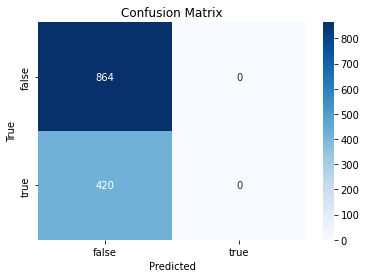

In [71]:
# Get the most used label in valid set and use it as a baseline. 
majority_label = np.unique(valid_true, return_counts=True)[0][np.argmax(np.unique(valid_true, return_counts=True)[1])]
valid_baseline = [majority_label for i in range(len(valid_true))]

# Get the most used label in test set and use it as a baseline.
majority_label = np.unique(test_true, return_counts=True)[0][np.argmax(np.unique(test_true, return_counts=True)[1])]
test_baseline = [majority_label for i in range(len(test_true))]

# print classification report and confusion matrix as a heatmap for valid set
print(classification_report(valid_true, valid_baseline, zero_division=0))
cm = confusion_matrix(valid_true, valid_baseline)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



              precision    recall  f1-score   support

       false       0.65      1.00      0.78       818
        true       0.00      0.00      0.00       449

    accuracy                           0.65      1267
   macro avg       0.32      0.50      0.39      1267
weighted avg       0.42      0.65      0.51      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

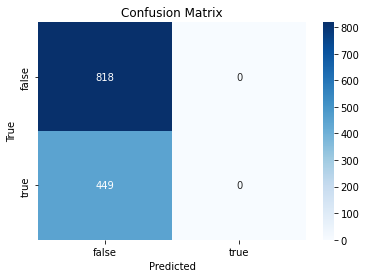

In [72]:
# print classification report and confusion matrix as a heatmap for test set
print(classification_report(test_true, test_baseline, zero_division=0))
cm = confusion_matrix(test_true, test_baseline)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Zero-shot classification with sentence-transformer NLI models

In [73]:
from zero_shot_models.nli_sentencetransformer import get_nli_transformer_prediction

In [74]:
labels = ['true', 'false']

In [76]:
valid_context = valid.copy()
test_context = test.copy()

valid_context["text_context"] = valid_context[['statement', 'speaker', 'subject', 'speaker_job', 'context']].apply(lambda x: f'"{x[0]}", says the {x[3]} {x[1]} about the subject {x[2]} in the {x[4]}', axis=1)
test_context["text_context"] = test_context[['statement', 'speaker', 'subject', 'speaker_job', 'context']].apply(lambda x: f'"{x[0]}", says the {x[3]} {x[1]} about the subject {x[2]} in the {x[4]}', axis=1)

In [77]:
valid_nli_results = get_nli_transformer_prediction(valid_context.copy(), "text_context", labels)
valid_nli_results.to_csv('valid_nli_results_binary_context.csv', index=False)


100%|██████████| 1284/1284 [03:29<00:00,  6.12it/s]


In [78]:

test_nli_results = get_nli_transformer_prediction(test_context.copy(), "text_context", labels)
test_nli_results.to_csv('test_nli_results_binary_context.csv', index=False)


100%|██████████| 1267/1267 [03:37<00:00,  5.82it/s]


              precision    recall  f1-score   support

       false       0.68      0.90      0.77       864
        true       0.38      0.13      0.20       420

    accuracy                           0.65      1284
   macro avg       0.53      0.51      0.48      1284
weighted avg       0.58      0.65      0.58      1284



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

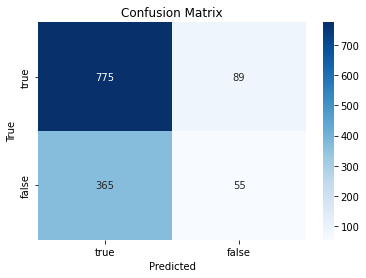

In [79]:
# print classification report and confusion matrix as a heatmap for valid set
print(classification_report(valid_nli_results.label, valid_nli_results.prediction, zero_division=0))
cm = confusion_matrix(valid_nli_results.label, valid_nli_results.prediction)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

       false       0.65      0.90      0.76       818
        true       0.42      0.12      0.19       449

    accuracy                           0.63      1267
   macro avg       0.54      0.51      0.48      1267
weighted avg       0.57      0.63      0.56      1267



<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

Text(0.5, 15.0, 'Predicted')

Text(33.0, 0.5, 'True')

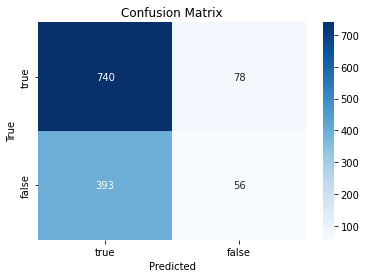

In [80]:
# print classification report and confusion matrix as a heatmap for test set
print(classification_report(test_nli_results.label, test_nli_results.prediction, zero_division=0))
cm = confusion_matrix(test_nli_results.label, test_nli_results.prediction)
# make a heatmap with labels and values and a blue-ish color scheme
# Include a row for the supports
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Zero-shot classification with Sentence transformer

In [81]:
from zero_shot_models.transfomer import get_transformer_prediction

In [82]:
model_name = 'cross-encoder/nli-distilroberta-base'
valid_sentransformer_results = get_transformer_prediction(valid_context.copy(), "text_context", labels, model_name)
valid_sentransformer_results.to_csv('valid_sentransformer_results_binary_context.csv', index=False)


100%|██████████| 1284/1284 [04:27<00:00,  4.80it/s]


In [83]:
test_sentransformer_results = get_transformer_prediction(test_context.copy(), "text_context", labels, model_name)
test_sentransformer_results.to_csv('test_sentransformer_results_binary_context.csv', index=False)


100%|██████████| 1267/1267 [04:17<00:00,  4.91it/s]


# Zero-shot classification with transformer models

In [84]:
from zero_shot_models.transfomer import get_transformer_prediction

In [85]:
valid_transformer_results = get_transformer_prediction(valid_context.copy(), "text_context", labels)
valid_transformer_results.to_csv('valid_transformer_results_binary_context.csv', index=False)

100%|██████████| 1284/1284 [38:11<00:00,  1.78s/it]


In [86]:
test_transformer_results = get_transformer_prediction(test_context.copy(), "text_context", labels)
test_transformer_results.to_csv('test_transformer_results_binary_context.csv', index=False)

100%|██████████| 1267/1267 [33:44<00:00,  1.60s/it] 
